In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

data = np.load("data.npy")
labels = np.load("labels.npy")

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
classifier = LogisticRegression()

On utilise les algorithmes de réduction de dimensionnalité tels que la PCA, t-SNE, ISOMAP et UMAP. Nous récoltons les données à partir des fichiers "data.npy" et "labels.npy" récolté en 6 dimensions par 6 capteurs différents. Plusieurs méthodes de visualisation sont utilisées pour obtenir différentes perspectives sur les données et potentiellement découvrir des motifs qui ne sont pas visibles en utilisant une méthode unique.

## PCA

<IPython.core.display.Javascript object>


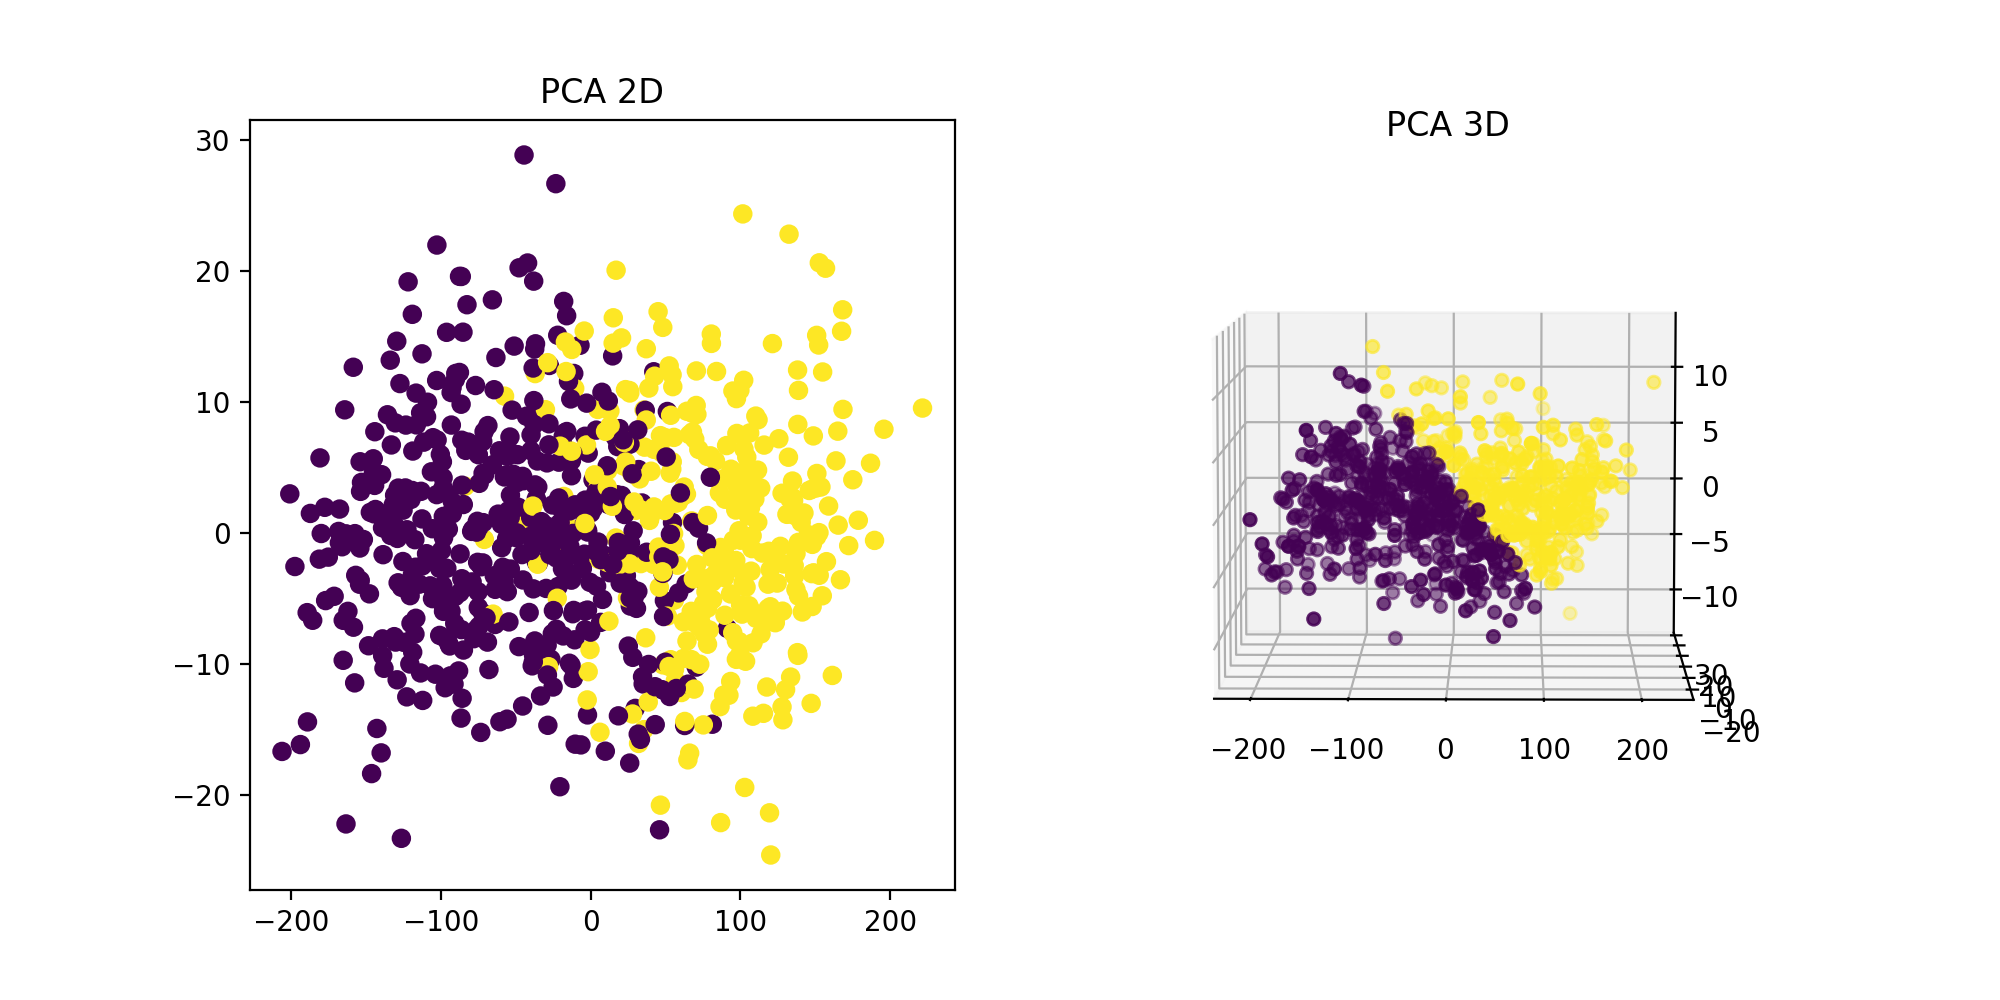

In [2]:
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)
X_train_pca_2d = pca_2d.fit_transform(X_train)
X_test_pca_2d = pca_2d.transform(X_test)

pca_3d = PCA(n_components=3)
data_3d = pca_3d.fit_transform(data)
X_train_pca_3d = pca_3d.fit_transform(X_train)
X_test_pca_3d = pca_3d.transform(X_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels)
plt.title("PCA 2D")

ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels)
ax.set_title("PCA 3D")
plt.show()

Avec la méthode PCA, en naviguant dans l’espace 3D nous pouvons constater une séparation parfaite.
___

## T-SNE

<IPython.core.display.Javascript object>


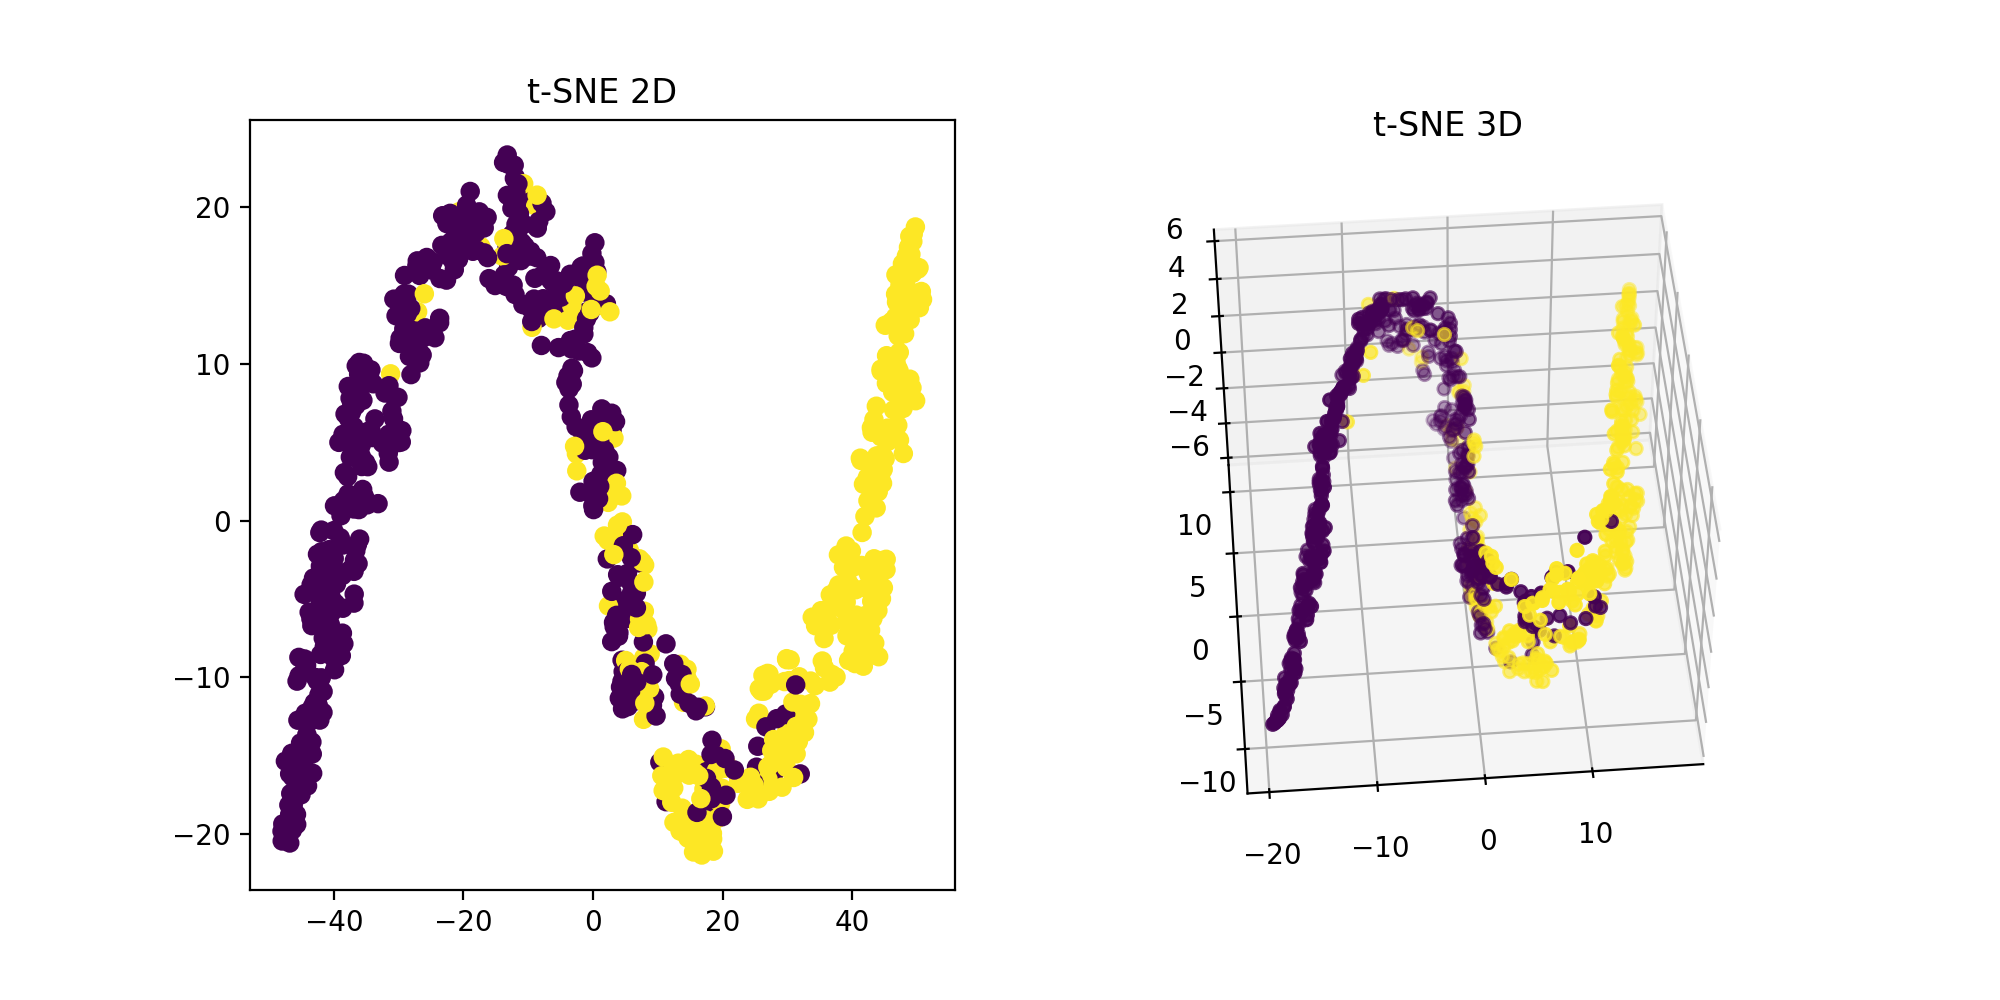

In [4]:
with warnings.catch_warnings():
   warnings.simplefilter(action='ignore', category=FutureWarning)
   tsne_2d = TSNE(n_components=2)
   data_2d_tsne = tsne_2d.fit_transform(data)

with warnings.catch_warnings():
   warnings.simplefilter(action='ignore', category=FutureWarning)
   tsne_3d = TSNE(n_components=3)
   data_3d_tsne = tsne_3d.fit_transform(data)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c=labels)
plt.title("t-SNE 2D")

ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(data_3d_tsne[:, 0], data_3d_tsne[:, 1], data_3d_tsne[:, 2], c=labels)
ax.set_title("t-SNE 3D")
plt.show()

Avec la méthode t-SNE, il existe des espaces avec des chevauchements, on en déduit que cette méthode manque de précision dans ce cas-là.
___

## UMAP

<IPython.core.display.Javascript object>


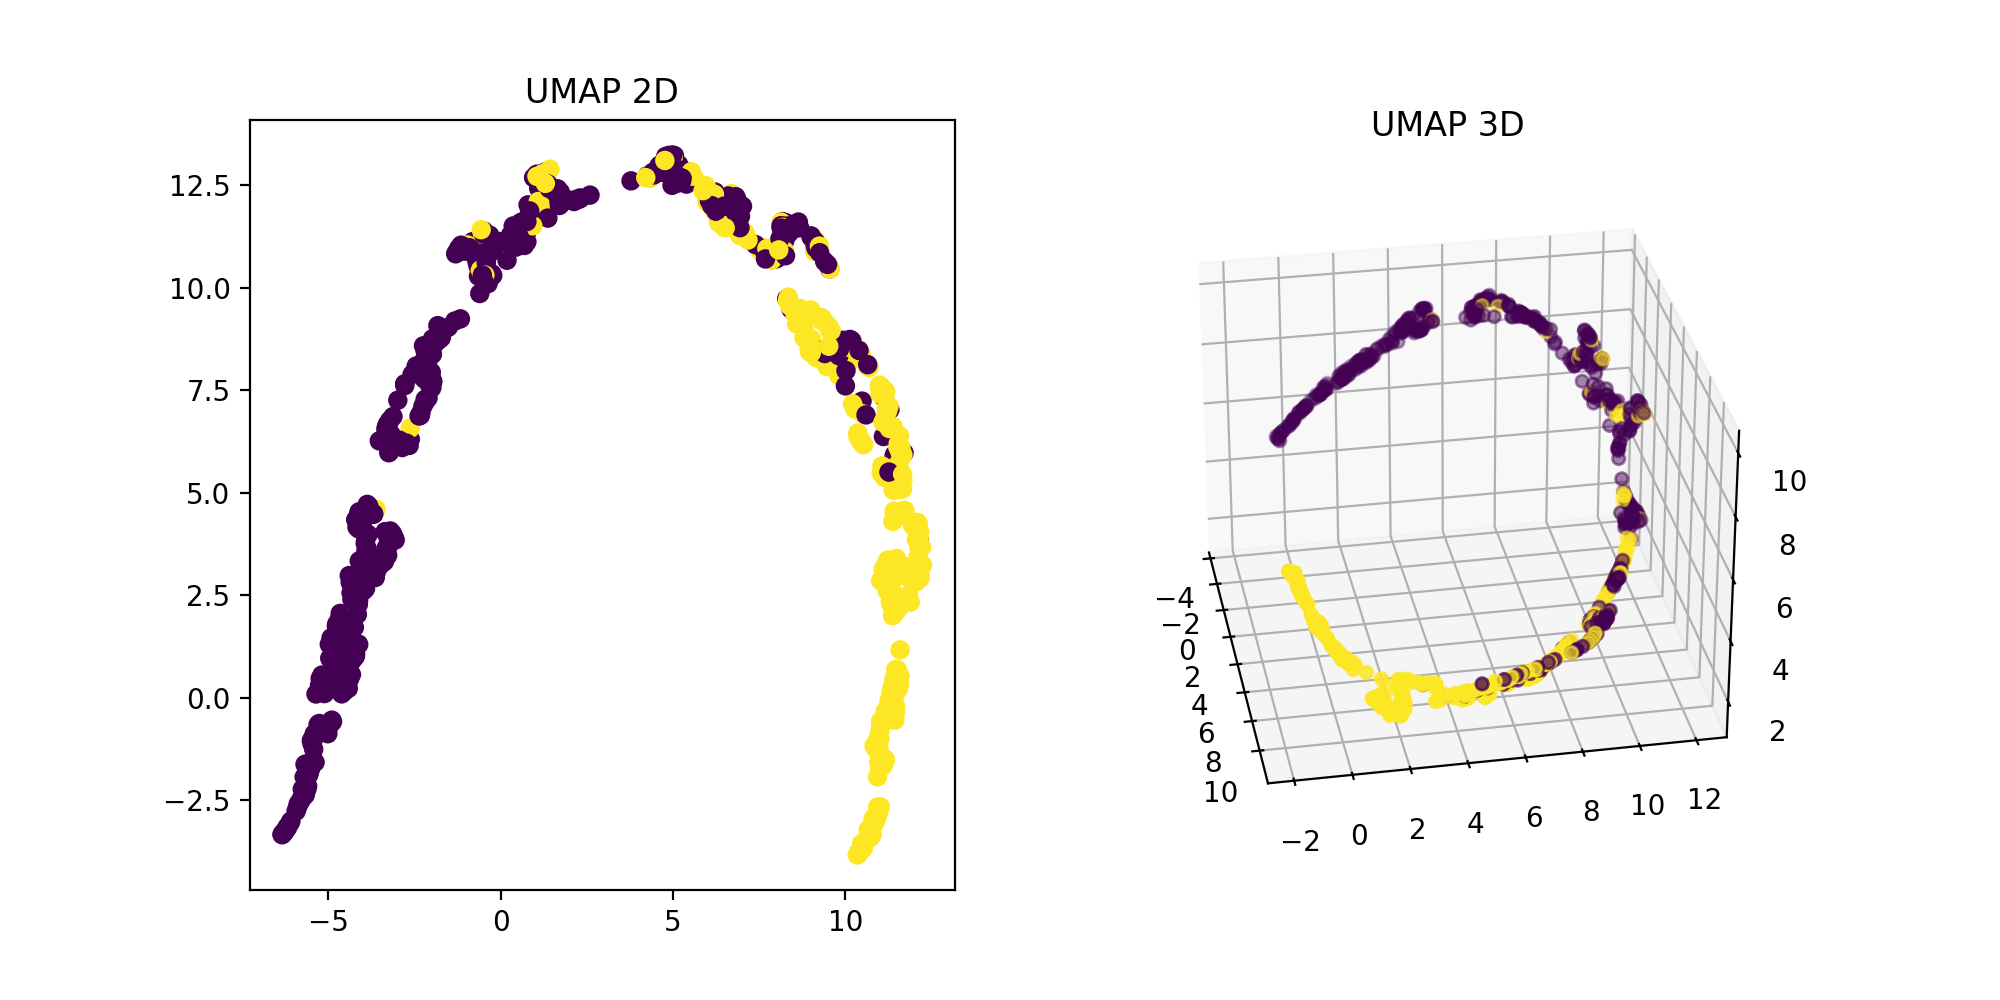

In [5]:
umap_2d = umap.UMAP(n_components=2)
data_2d_umap = umap_2d.fit_transform(data)
X_train_umap_2d = umap_2d.fit_transform(X_train)
X_test_umap_2d = umap_2d.transform(X_test)

umap_3d = umap.UMAP(n_components=3)
data_3d_umap = umap_3d.fit_transform(data)
X_train_umap_3d = umap_3d.fit_transform(X_train)
X_test_umap_3d = umap_3d.transform(X_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_2d_umap[:, 0], data_2d_umap[:, 1], c=labels)
plt.title("UMAP 2D")

ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(data_3d_umap[:, 0], data_3d_umap[:, 1], data_3d_umap[:, 2], c=labels)
ax.set_title("UMAP 3D")
plt.show()

Avec la méthode Umap, il existe des espaces avec des chevauchements, on en déduit que cette méthode manque de précision dans ce cas-là.
___

## ISOMAP

<IPython.core.display.Javascript object>


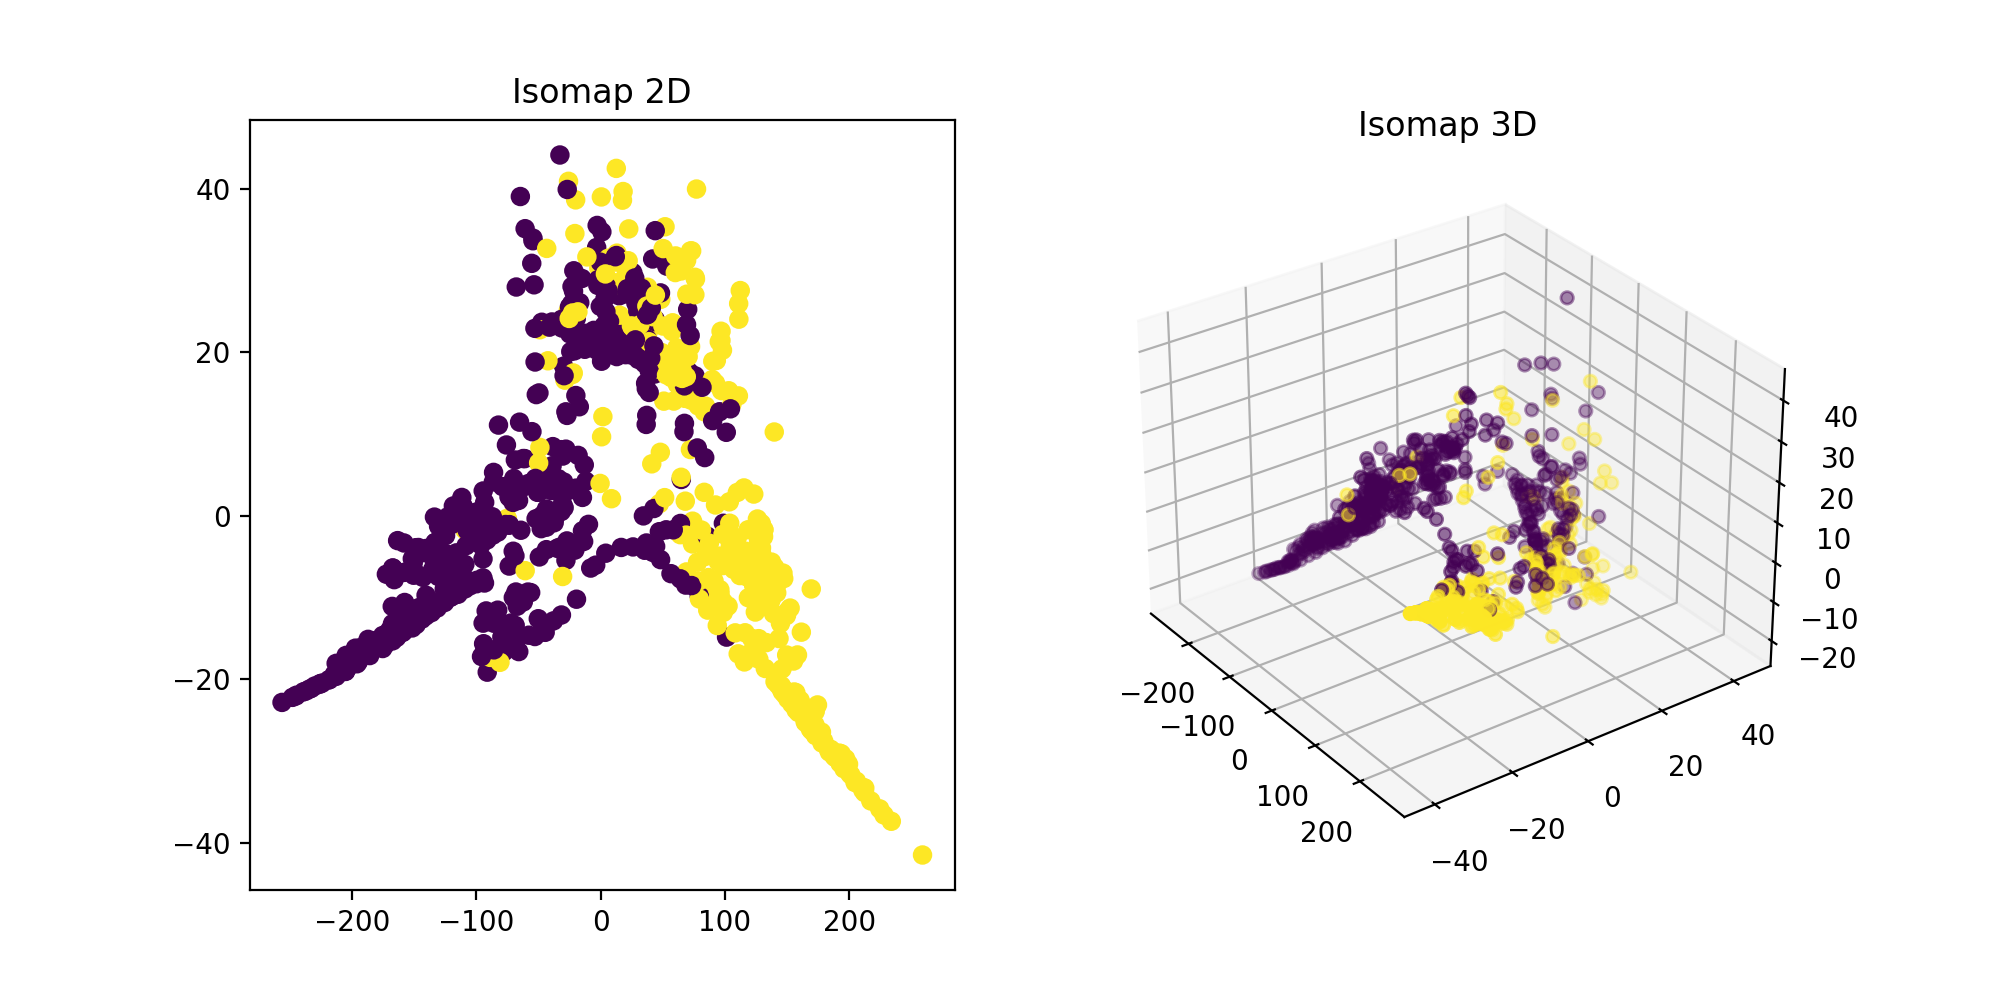

In [6]:
isomap_2d = Isomap(n_components=2)
data_2d_isomap = isomap_2d.fit_transform(data)
X_train_isomap_2d = isomap_2d.fit_transform(X_train)
X_test_isomap_2d = isomap_2d.transform(X_test)

isomap_3d = Isomap(n_components=3)
data_3d_isomap = isomap_3d.fit_transform(data)
X_train_isomap_3d = isomap_3d.fit_transform(X_train)
X_test_isomap_3d = isomap_3d.transform(X_test)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_2d_isomap[:, 0], data_2d_isomap[:, 1], c=labels)
plt.title("Isomap 2D")

ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(data_3d_isomap[:, 0], data_3d_isomap[:, 1], data_3d_isomap[:, 2], c=labels)
ax.set_title("Isomap 3D")
plt.show()

Avec la méthode Isomap, il existe des espaces avec des chevauchements, on en déduit que cette méthode manque de précision dans ce cas-là.
___

Nous pouvons vérifier ces données avec la méthode de régression logistique, en appliquant cette méthode nous pouvons obtenir une confirmation quantitative de la méthode la plus précise dans notre cas.

In [7]:
classifier.fit(X_train_pca_2d, y_train)
accuracy_pca_2d = accuracy_score(y_test, classifier.predict(X_test_pca_2d))
print("PCA 2D:", accuracy_pca_2d)

classifier.fit(X_train_pca_3d, y_train)
accuracy_pca_3d = accuracy_score(y_test, classifier.predict(X_test_pca_3d))
print("PCA 3D:", accuracy_pca_3d)

classifier.fit(X_train_umap_2d, y_train)
accuracy_umap_2d = accuracy_score(y_test, classifier.predict(X_test_umap_2d))
print("UMAP 2D:", accuracy_umap_2d)

classifier.fit(X_train_umap_3d, y_train)
accuracy_umap_3d = accuracy_score(y_test, classifier.predict(X_test_umap_3d))
print("UMAP 3D:", accuracy_umap_3d)

classifier.fit(X_train_isomap_2d, y_train)
accuracy_isomap_2d = accuracy_score(y_test, classifier.predict(X_test_isomap_2d))
print("ISOMAP 2D:", accuracy_isomap_2d)

classifier.fit(X_train_isomap_3d, y_train)
accuracy_isomap_3d = accuracy_score(y_test, classifier.predict(X_test_isomap_3d))
print("ISOMAP 3D:", accuracy_isomap_3d)

PCA 2D: 0.83125
PCA 3D: 1.0
UMAP 2D: 0.79375
UMAP 3D: 0.8
ISOMAP 2D: 0.80625
ISOMAP 3D: 0.8125


Après application de la méthode, nous obtenons les résultats ci-dessus.
>_Il est impossible d’appliquer la formule pour la méthode t-SNE_

__De par ces résultats, nous pouvons donc en conclure que la méthode la plus efficace est la méthode PCA 3D__